# Allocate Benchmarks

In [25]:
# select measurement file
file_name = "../output/2024-08-27 11-40-37 full.json"

# select style options
grey_fill_between = False

enable_storage_reference = True

if grey_fill_between:
    fill_between_args = {"color": "grey"}
else:
    fill_between_args = {}

In [26]:
# parse data
import json

with open(file_name) as file:
    raw_data = json.load(file)

In [27]:
from util.convert import convert_data
from IPython.core.display import HTML

# filter and convert data
deallocate_min = convert_data(raw_data, "deallocate_min", ["mean", "min", "max", "options.object_size", "machine_name", "cold_start", "repetitions"])
deallocate_max = convert_data(raw_data, "deallocate_max", ["mean", "min", "max", "options.object_size", "machine_name", "cold_start", "repetitions"])
deallocate_case1 = convert_data(raw_data, "deallocate_case_1", ["mean", "min", "max", "options.object_size", "machine_name", "cold_start", "repetitions"])

display(HTML("<b>MIN Data:</b>"))
display(deallocate_min.head())
display(HTML("<b>MAX Data:</b>"))
display(deallocate_max.head())
display(HTML("<b>Case 1 Data:</b>"))
display(deallocate_case1.head())

,mean,min,max,options.object_size,machine_name,cold_start,repetitions,ticks_per_ms
0,2108.0,2108,2108,0,esp32c3,100,1000,16000
1,2111.0,2111,2111,32,esp32c3,100,1000,16000
2,2111.0,2111,2111,64,esp32c3,100,1000,16000
3,2111.0,2111,2111,96,esp32c3,100,1000,16000
4,2111.0,2111,2111,128,esp32c3,100,1000,16000


,mean,min,max,options.object_size,machine_name,cold_start,repetitions,ticks_per_ms
0,66025.5,66024,66027,0,esp32c3,100,1000,16000
1,37186.0,37186,37186,32,esp32c3,100,1000,16000
2,32537.0,32445,32629,64,esp32c3,100,1000,16000
3,32168.0,32168,32168,96,esp32c3,100,1000,16000
4,32457.5,32381,32534,128,esp32c3,100,1000,16000


,mean,min,max,options.object_size,machine_name,cold_start,repetitions,ticks_per_ms
0,37721.0,37721,37721,0,esp32c3,100,1000,16000
1,15996.0,15996,15996,32,esp32c3,100,1000,16000
2,3923.0,3923,3923,64,esp32c3,100,1000,16000
3,4317.0,4317,4317,96,esp32c3,100,1000,16000
4,4575.0,4575,4575,128,esp32c3,100,1000,16000


In [28]:

from util.convert import get_storage_measurement
from IPython.core.display import HTML

(storage_read, storage_write) = get_storage_measurement(raw_data, deallocate_max["options.object_size"].max())

display(HTML("<b>READ Data:</b>"))
display(storage_read.head())
display(HTML("<b>WRITE Data:</b>"))
display(storage_write.head())

,mean,min,max,options.object_size,machine_name,cold_start,repetitions,ticks_per_ms
0,616.0,616,616,0,esp32c3,100,1000,16000
1,1095.0,1095,1095,32,esp32c3,100,1000,16000
2,1433.0,1433,1433,64,esp32c3,100,1000,16000
3,1911.0,1911,1911,96,esp32c3,100,1000,16000
4,2249.0,2249,2249,128,esp32c3,100,1000,16000


,mean,min,max,options.object_size,machine_name,cold_start,repetitions,ticks_per_ms
0,1136.000,1136,1136,0,esp32c3,100,1000,16000
1,1532.000,1532,1532,32,esp32c3,100,1000,16000
2,1789.000,1789,1789,64,esp32c3,100,1000,16000
3,2185.136,2185,2258,96,esp32c3,100,1000,16000
4,2442.000,2442,2442,128,esp32c3,100,1000,16000


# Final Plot

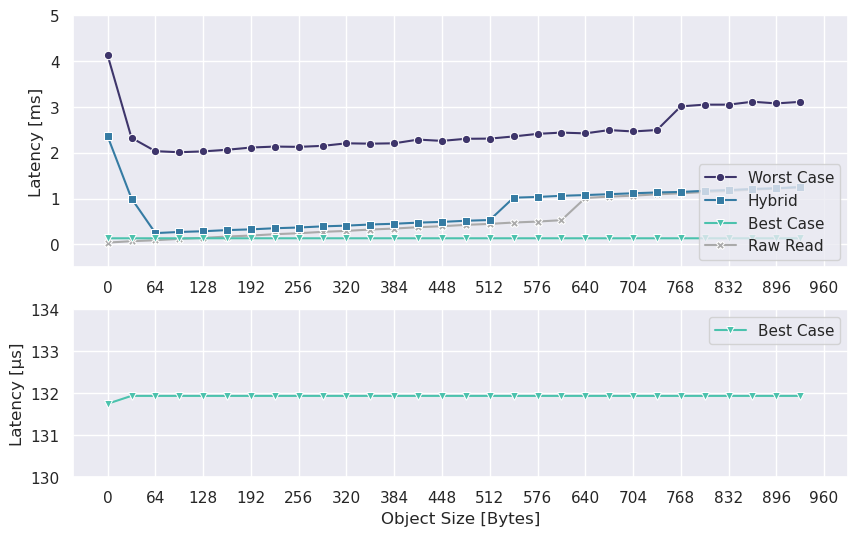

In [31]:
from util.plot import set_gird, save_plot, set_theme
from util.convert import scale_data
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

set_theme()

fig = plt.figure(1)
fig.set_figheight(6)
fig.set_figwidth(10)

gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[1.5, 1])

ax = plt.subplot(gs[0])

unit = "ms"

if enable_storage_reference and len(storage_read) != 0:
    storage_read_scaled = scale_data(storage_read, unit)
    sns.lineplot(ax=ax, x=storage_read_scaled["options.object_size"], y=storage_read_scaled["mean"], label="Raw Read", markers=["o"], marker="X", color="#aaaaaa")

if len(deallocate_max) != 0:
    deallocate_max_scaled = scale_data(deallocate_max, unit)
    sns.lineplot(ax=ax, x=deallocate_max_scaled["options.object_size"], y=deallocate_max_scaled["mean"], label="Worst Case", markers=["o"], marker="o")
    ax.fill_between(deallocate_max_scaled["options.object_size"], deallocate_max_scaled["min"], deallocate_max_scaled["max"], alpha=0.2, **fill_between_args)

if len(deallocate_case1) != 0:
    deallocate_case1_scaled = scale_data(deallocate_case1, unit)
    sns.lineplot(ax=ax, x=deallocate_case1_scaled["options.object_size"], y=deallocate_case1_scaled["mean"], label="Hybrid", markers=["o"], marker="s")
    ax.fill_between(deallocate_case1_scaled["options.object_size"], deallocate_case1_scaled["min"], deallocate_case1_scaled["max"], alpha=0.2, **fill_between_args)


if len(deallocate_min) != 0:
    deallocate_min_scaled = scale_data(deallocate_min, unit)
    sns.lineplot(ax=ax, x=deallocate_min_scaled["options.object_size"], y=deallocate_min_scaled["mean"], label="Best Case", markers=["o"], marker="v")
    ax.fill_between(deallocate_min_scaled["options.object_size"], deallocate_min_scaled["min"], deallocate_min_scaled["max"], alpha=0.2, **fill_between_args)

set_gird(64, max(deallocate_min["options.object_size"].max(), deallocate_max["options.object_size"].max()), ax)

ax.set_xlabel(None)
ax.set_ylabel(f"Latency [{unit}]")
ax.set_ylim(bottom=-0.5, top=5)


if enable_storage_reference:
    handles, labels = plt.gca().get_legend_handles_labels()
    handles.append(handles.pop(0))
    labels.append(labels.pop(0))
    ax.legend(handles, labels, loc = "lower right")
else:
    ax.legend(loc = "lower right")

set_theme(3, 2)

ax = plt.subplot(gs[1])

# unit = "ms"
unit = "µs"

# if len(deallocate_max) != 0:
#     deallocate_max_scaled = scale_data(deallocate_max, unit)
#     sns.lineplot(ax=ax, x=deallocate_max_scaled["options.object_size"], y=deallocate_max_scaled["mean"], label="Worst Case", markers=["o"], marker="o")
#     ax.fill_between(deallocate_max_scaled["options.object_size"], deallocate_max_scaled["min"], deallocate_max_scaled["max"], alpha=0.2, **fill_between_args)


# if len(deallocate_case1) != 0:
#     deallocate_case1_scaled = scale_data(deallocate_case1, unit)
#     sns.lineplot(ax=ax, x=deallocate_case1_scaled["options.object_size"], y=deallocate_case1_scaled["mean"], label="Additional Example", markers=["o"], marker="s")
#     ax.fill_between(deallocate_case1_scaled["options.object_size"], deallocate_case1_scaled["min"], deallocate_case1_scaled["max"], alpha=0.2, **fill_between_args)


if len(deallocate_min) != 0:
    deallocate_min_scaled = scale_data(deallocate_min, unit)
    sns.lineplot(ax=ax, x=deallocate_min_scaled["options.object_size"], y=deallocate_min_scaled["mean"], label="Best Case", markers=["o"], marker="v")
    ax.fill_between(deallocate_min_scaled["options.object_size"], deallocate_min_scaled["min"], deallocate_min_scaled["max"], alpha=0.2, **fill_between_args)

set_gird(64, max(deallocate_min["options.object_size"].max(), deallocate_max["options.object_size"].max()), ax)

ax.set_xlabel("Object Size [Bytes]")
ax.set_ylabel(f"Latency [{unit}]")
ax.set_ylim(bottom=130, top=134)


save_plot("deallocate", save_asset=True)